In [1]:
import pandas as pd
import numpy as np
import ast
import json

import re
from collections import defaultdict

from numpy import savetxt

from sklearn.manifold import TSNE
import plotly.express as px

In [2]:
df = pd.read_csv('data/final_dataset_reduced.csv')

In [46]:
dataset_dict_list = df.to_dict('records')

In [47]:
lyrics_matrix = [s['lyrics'] for s in dataset_dict_list]

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [49]:
vectorizer = TfidfVectorizer()
td_matrix = vectorizer.fit_transform(lyrics_matrix)

In [50]:
feature_names = vectorizer.get_feature_names() 
len(feature_names)

54844

In [51]:
from scipy.sparse.linalg import svds
# do SVD with a very large k (we usually use 100), just for the sake of getting many sorted singular values (aka importances)
# u,s,v_trans = svds(td_matrix, k=1000)

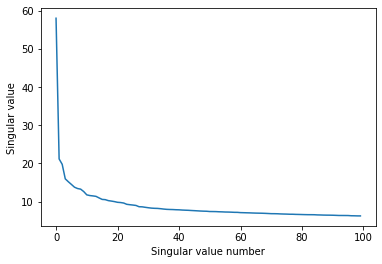

In [52]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(s[::-1])
plt.xlabel("Singular value number")
plt.ylabel("Singular value")
plt.show()

In [53]:
u,s,v_trans = svds(td_matrix, k=100)
v = v_trans.transpose()

In [54]:
r = 0.25
USr = u @ (np.diag(s) ** r)
USr.shape

(32028, 100)

In [55]:
with open('lyric_svd_embeddings.json', 'w') as fp:
  json.dump(USr.tolist(), fp)

In [56]:
with open('data/albums_to_song_indexes.json', 'r') as fp:
  albums_to_song_indexes = json.load(fp)

In [57]:
albums_to_lyrics_USr = dict()

In [58]:
for album, song_indexes in albums_to_song_indexes.items():
    album_lyric_USr = np.zeros(100)
    for s_idx in song_indexes:
        album_lyric_USr += USr[s_idx]
    
    album_lyric_USr /= len(song_indexes)

    albums_to_lyrics_USr[album] = album_lyric_USr.tolist()

In [59]:
albums_to_lyrics_USr

{'BEYONCÉ - Beyoncé': [-0.003282594317156879,
  -0.00023768190666022455,
  -0.0006894165029369435,
  0.0018627038257492535,
  0.0002513624876112625,
  -0.0012556997166641077,
  -0.0044994988380526926,
  0.0048088109521999545,
  -0.002837624407983247,
  -0.001431062694504372,
  -0.0024506696516977274,
  -0.0019057333206090662,
  -0.0007384297477087279,
  0.00026389115070356035,
  -0.0009199938974777042,
  0.0023357277480446363,
  -0.0039348130375780775,
  0.0025692990322742294,
  -0.0024532870677777883,
  0.0010730441179056045,
  0.0011592762246003545,
  0.0005136348222641088,
  3.056105803618958e-05,
  0.0008159180894375043,
  -0.0001415238573187889,
  0.0016523972173961576,
  -0.0006792167738856101,
  0.0033952340374345815,
  0.0005501948176942633,
  0.0018630552141827145,
  -0.0015560842359433561,
  0.0028944198645611484,
  0.0036867445438368376,
  0.0014561708699534978,
  -0.00054635388736897,
  -0.0001253306287542685,
  0.007067660628495352,
  -0.0014695303043815082,
  -0.001552647

In [60]:
with open('albums_to_lyric_svd_embeddings.json', 'w') as fp:
  json.dump(albums_to_lyrics_USr, fp)